<a href="https://colab.research.google.com/github/AlekSSSandraJ/readnew/blob/main/NLP_CW_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1
TO DO:
1. Pre-process the Dataset [5 marks]. Develop code to clean and pre-process the dataset. Look at the dictionary to ensure you’ve cleaned the data well.
2. Latent Semantic Indexing (LSI) and Neural Information Retrieval [25 marks].
    * Develop and tune a Latent Semantic Indexing (LSI) model
    * and a Neural information retrieval model (15 marks).
    
    * Evaluate the performance of the models using suitable evaluation metrics and present the results of your evaluations using tables and graphs.
    *  Provide brief remarks on your observations (10 marks).

3. Clustering and Analysis [10 marks]. Extend your answer to Task 2 to include clustering of search results. This algorithm should take as input the top 100 search results of your chosen query and cluster them into topics. Dynamically determine the optimal number of clusters using a suitable method (5 marks). Evaluate the clustering performance of the model using suitable evaluation metrics and provide brief remarks on your evaluations. (5 marks).
4. SummariseTopicswithinClustersofSearchResults[10marks].ExtendyouranswertoTask3toincludeanapproach that takes the results from each cluster and summarises them using one abstractive and one extractive method (5 marks). Evaluate the performance of the models using suitable evaluation metrics. Note that you can use ChatGPT or another tool to create the reference summaries. Explain the findings. (5 marks).

1. PRE PROCESSING

Removing noise: Strip out unnecessary symbols, numbers, and formatting in the reviews.
Tokenization: Break down the text into individual words or tokens.
Normalization: Convert all text to lowercase, standardize terms, and perhaps employ stemming or lemmatization.
Removing stop words: Filter out common words that might not be useful in analysis.
Spell check: Correct spelling errors within the reviews.

# 1. Pre-Processing

##  1.1 Load Datasets

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"
Data_path = "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"

JewelleryReviewsLSA.csv			  processed_reviews.csv
JewelleryReviewsQueryRelevantID.csv	  processed_summarisation_targets.csv
JewelleryReviewsSummarisationTargets.csv


In [7]:
import pandas as pd

# Paths to the datasets
data_path = "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"

reviews_path = data_path + "JewelleryReviewsLSA.csv"
query_relevance_path = data_path + "JewelleryReviewsQueryRelevantID.csv"
summarisation_targets_path = data_path + "JewelleryReviewsSummarisationTargets.csv"


# Loading the datasets
reviews_df = pd.read_csv(reviews_path)
query_relevance_df = pd.read_csv(query_relevance_path)
summarisation_targets_df = pd.read_csv(summarisation_targets_path)



## 1.2 Understanding Datasets

In [8]:
import pandas as pd
from IPython.display import display

# Adjust display settings for better table visualization
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#  styling DataFrame
def styled_df(df):
    return df.style.set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#add8e6'),   # blue header
                    ('color', 'black'),
                    ('font-family', 'Arial')]},
         {'selector': 'td',
          'props': [('background-color', '#f4f4f4'),   # gray backgroud
                    ('color', 'black')]}]
    ).set_properties(**{'border': '1.5px solid lightgrey'})

# Assuming reviews_df is your DataFrame
print("Reviews Dataset:")
display(styled_df(reviews_df))



Reviews Dataset:


,ID,Reviews,Ratings
0,32767,"i expect like regular size of ring,but this one look like a ring for toy or something funy, the MM of our rings is 5MM and this ring may be is 1MMso ridiculousMartin1/5 ct.tw Round Diamond Solitaire Ring in 18k White Gold",1
1,15959,"I ordered a ring that stated Toe Ring"" in the description. The ring came very quickly but was not a toe ring. I don't know anyone with a size 8 toe. If you know anyone please direct them to this seller! Is it a wedding band, toe ring or thumb ring? Pick one!",1
2,43515,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",1
3,46347,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",1
4,30720,This is a huge waste of money I had it for about a month when the part that holds the symbol to the necklace broke. I seriously not wasting your money on this low quality item,1
5,1816,The quality and look were not what I had anticipated. Very flimsy.I would not recommend this item,1
6,265,"The quality of this item was not up to expectations.The Top was scratched, the hinges did not line up to the pre-drilled holes and the staining was inconsistant. If I saw this item in a store I would not have purchased it.",1
7,54548,"hard and can't wear it, the material is hard and not easy to wear I just don't like it I should have saved my money and got on from A&E",1
8,28250,"I wanted to know if this ring is like 2 rings in one, because this ring is beyond gorgeous, I just love it.",2
9,30773,"Nice ring for the an inexpensive ring, but one stone was missing. It was not worth returning it as you would pay more for postage than what the ring cost.",2


In [9]:
print("Summarisation Dataset:")
display(styled_df(summarisation_targets_df))

Summarisation Dataset:


,Ratings,Targets
0,1,I will not be buying this ring again. I will not be ordering from Amazon or this jeweler in the future. The first shipment of this ring had scratches on the diamond. Very disappointed in the appearance and quality.
1,2,It was not worth returning it as you would pay more for postage than what the ring cost. The ring was nice and looked like picture but had a crack in one Garnet and another one had a large chip. I would recommend you spend it a little bit more and buy a better looking ring. I'm very disappointed with amazon for the lack of description.
2,3,This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds. I was not sure if the diamonds were actually blue or not. I was a little disappointed with the size of the rings. Only thing is you cant have this ring resized.
3,4,I love the shipping pace. The ring itself is beautiful. I have been looking for a ring that is so beautiful and unique. This is a solid.beautiful ring. But if you are expecting the color in rhe picture you will be disappointed. I love this ring my only complaint is that the metal is so soft.
4,5,This ring is gorgeous. I love the ring and would recommend it to anyone who likes to wear a ring. I am a huge fan of the ring and I would recommend it to anyone looking for a ring. I am so glad I bought this ring.


## 1.3 Cleaning Dataset

Remove Non-Alphabetic Characters:
It's useful for removing unnecessary punctuation and numbers, which typically do not contribute to sentiment analysis or other NLP tasks unless specific numeric or symbolic meanings are relevant (e.g., "5-star").

Convert to Lowercase:
This standardizes the text to ensure that the same words are recognized regardless of their place in a sentence.

Tokenize:
Convert strings into lists of tokens or words. You can do this more thoroughly by considering not just spaces but punctuation and special characters as delimiters.

Remove Stopwords:
Stopwords (common words like 'and', 'the', etc.) are usually removed because they do not contribute to the overall meaning of a sentence in the context of many analysis tasks.
Lemmatization:
This reduces words to their base or root form, which helps in consolidating different forms of a word into a single representation (e.g., "running" to "run").

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove unwanted whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into processed text
   # processed_text = ' '.join(lemmatized_words)
    return ' '.join(lemmatized_words)


In [12]:
# Apply preprocessing
reviews_df['Processed_Reviews'] = reviews_df['Reviews'].apply(preprocess_text)

columns_to_display = ['ID', 'Reviews', 'Processed_Reviews']

# updated DataFrame table
print("Processed Reviews Dataset:")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
display(styled_df(reviews_df[columns_to_display]))

Processed Reviews Dataset:


,ID,Reviews,Processed_Reviews
0,32767,"i expect like regular size of ring,but this one look like a ring for toy or something funy, the MM of our rings is 5MM and this ring may be is 1MMso ridiculousMartin1/5 ct.tw Round Diamond Solitaire Ring in 18k White Gold",expect like regular size ring one look like ring toy something funy mm ring mm ring may mmso ridiculousmartin ct tw round diamond solitaire ring k white gold
1,15959,"I ordered a ring that stated Toe Ring"" in the description. The ring came very quickly but was not a toe ring. I don't know anyone with a size 8 toe. If you know anyone please direct them to this seller! Is it a wedding band, toe ring or thumb ring? Pick one!",ordered ring stated toe ring description ring came quickly toe ring know anyone size toe know anyone please direct seller wedding band toe ring thumb ring pick one
2,43515,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond look great time diamond missing shoulder ring returned refund thanks alot amazon
3,46347,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond look great time diamond missing shoulder ring returned refund thanks alot amazon
4,30720,This is a huge waste of money I had it for about a month when the part that holds the symbol to the necklace broke. I seriously not wasting your money on this low quality item,huge waste money month part hold symbol necklace broke seriously wasting money low quality item
5,1816,The quality and look were not what I had anticipated. Very flimsy.I would not recommend this item,quality look anticipated flimsy would recommend item
6,265,"The quality of this item was not up to expectations.The Top was scratched, the hinges did not line up to the pre-drilled holes and the staining was inconsistant. If I saw this item in a store I would not have purchased it.",quality item expectation top scratched hinge line pre drilled hole staining inconsistant saw item store would purchased
7,54548,"hard and can't wear it, the material is hard and not easy to wear I just don't like it I should have saved my money and got on from A&E",hard wear material hard easy wear like saved money got e
8,28250,"I wanted to know if this ring is like 2 rings in one, because this ring is beyond gorgeous, I just love it.",wanted know ring like ring one ring beyond gorgeous love
9,30773,"Nice ring for the an inexpensive ring, but one stone was missing. It was not worth returning it as you would pay more for postage than what the ring cost.",nice ring inexpensive ring one stone missing worth returning would pay postage ring cost


In [13]:
summarisation_targets_df['Processed_Targets'] = summarisation_targets_df['Targets'].apply(preprocess_text)

columns_to_display = ['Ratings','Targets', 'Processed_Targets']

# Display the updated DataFrame with selected columns
print("Processed Summarisation Targets Dataset:")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)  # Ensures all selected columns are shown
display(styled_df(summarisation_targets_df[columns_to_display]))

Processed Summarisation Targets Dataset:


,Ratings,Targets,Processed_Targets
0,1,I will not be buying this ring again. I will not be ordering from Amazon or this jeweler in the future. The first shipment of this ring had scratches on the diamond. Very disappointed in the appearance and quality.,buying ring ordering amazon jeweler future first shipment ring scratch diamond disappointed appearance quality
1,2,It was not worth returning it as you would pay more for postage than what the ring cost. The ring was nice and looked like picture but had a crack in one Garnet and another one had a large chip. I would recommend you spend it a little bit more and buy a better looking ring. I'm very disappointed with amazon for the lack of description.,worth returning would pay postage ring cost ring nice looked like picture crack one garnet another one large chip would recommend spend little bit buy better looking ring disappointed amazon lack description
2,3,This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds. I was not sure if the diamonds were actually blue or not. I was a little disappointed with the size of the rings. Only thing is you cant have this ring resized.,ring beautiful ring first shipment ring scratch diamond missing diamond sure diamond actually blue little disappointed size ring thing cant ring resized
3,4,I love the shipping pace. The ring itself is beautiful. I have been looking for a ring that is so beautiful and unique. This is a solid.beautiful ring. But if you are expecting the color in rhe picture you will be disappointed. I love this ring my only complaint is that the metal is so soft.,love shipping pace ring beautiful looking ring beautiful unique solid beautiful ring expecting color rhe picture disappointed love ring complaint metal soft
4,5,This ring is gorgeous. I love the ring and would recommend it to anyone who likes to wear a ring. I am a huge fan of the ring and I would recommend it to anyone looking for a ring. I am so glad I bought this ring.,ring gorgeous love ring would recommend anyone like wear ring huge fan ring would recommend anyone looking ring glad bought ring


##1.3.1 Further Cleaning & Potential Issues

* Negations

Negations such as "not good" vs "good" or "not sure" vs "sure" are critical in sentiment analysis as they change the meaning of the whole sentence. Therefore new funtion was added to the preprocessing to handle negations, it was based on merging them with the following word (for example "not_good") This help in maintaining the context of all reviews.


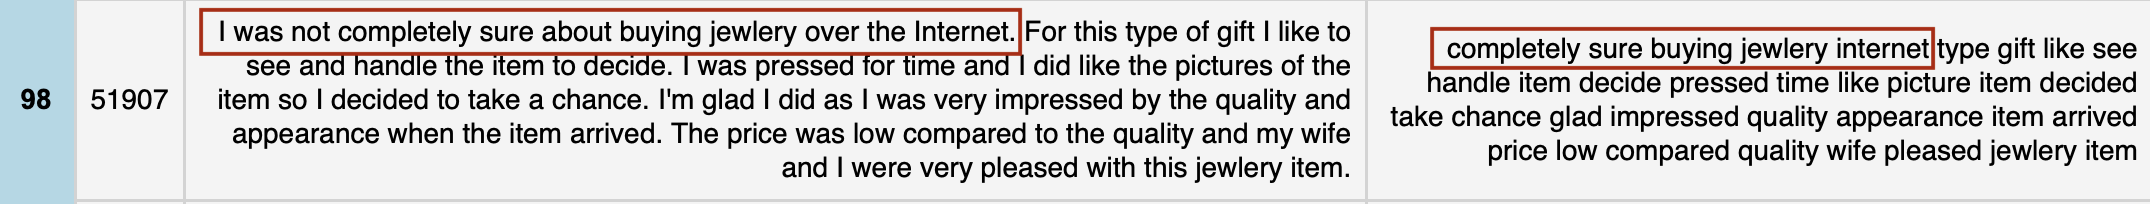

In [14]:
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove unwanted whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    words = text.split()

    # Handle negations: merge negation with the next word
    negations = {"not", "no", "never"}
    i = 0
    while i < len(words):
        if words[i] in negations and i+1 < len(words):
            words[i] = words[i] + "_" + words[i+1]  # Merge the negation with the following word
            words.pop(i+1)  # Remove the next word from the list
        else:
            i += 1

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into processed text
    return ' '.join(lemmatized_words)


In [15]:
# Apply preprocessing
reviews_df['Processed_Reviews'] = reviews_df['Reviews'].apply(preprocess_text)

columns_to_display = ['ID', 'Reviews', 'Processed_Reviews']

# updated DataFrame table
print("Processed Reviews Dataset:")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
display(styled_df(reviews_df[columns_to_display]))


Processed Reviews Dataset:


,ID,Reviews,Processed_Reviews
0,32767,"i expect like regular size of ring,but this one look like a ring for toy or something funy, the MM of our rings is 5MM and this ring may be is 1MMso ridiculousMartin1/5 ct.tw Round Diamond Solitaire Ring in 18k White Gold",expect like regular size ring one look like ring toy something funy mm ring mm ring may mmso ridiculousmartin ct tw round diamond solitaire ring k white gold
1,15959,"I ordered a ring that stated Toe Ring"" in the description. The ring came very quickly but was not a toe ring. I don't know anyone with a size 8 toe. If you know anyone please direct them to this seller! Is it a wedding band, toe ring or thumb ring? Pick one!",ordered ring stated toe ring description ring came quickly not_a toe ring know anyone size toe know anyone please direct seller wedding band toe ring thumb ring pick one
2,43515,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond not_look great time diamond missing shoulder ring returned refund thanks alot amazon
3,46347,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond not_look great time diamond missing shoulder ring returned refund thanks alot amazon
4,30720,This is a huge waste of money I had it for about a month when the part that holds the symbol to the necklace broke. I seriously not wasting your money on this low quality item,huge waste money month part hold symbol necklace broke seriously not_wasting money low quality item
5,1816,The quality and look were not what I had anticipated. Very flimsy.I would not recommend this item,quality look not_what anticipated flimsy would not_recommend item
6,265,"The quality of this item was not up to expectations.The Top was scratched, the hinges did not line up to the pre-drilled holes and the staining was inconsistant. If I saw this item in a store I would not have purchased it.",quality item not_up expectation top scratched hinge not_line pre drilled hole staining inconsistant saw item store would not_have purchased
7,54548,"hard and can't wear it, the material is hard and not easy to wear I just don't like it I should have saved my money and got on from A&E",hard wear material hard not_easy wear like saved money got e
8,28250,"I wanted to know if this ring is like 2 rings in one, because this ring is beyond gorgeous, I just love it.",wanted know ring like ring one ring beyond gorgeous love
9,30773,"Nice ring for the an inexpensive ring, but one stone was missing. It was not worth returning it as you would pay more for postage than what the ring cost.",nice ring inexpensive ring one stone missing not_worth returning would pay postage ring cost


# 1.3.2 Solutions & Further processing steps
* Negations Issue Solution

  - Initial processed data example

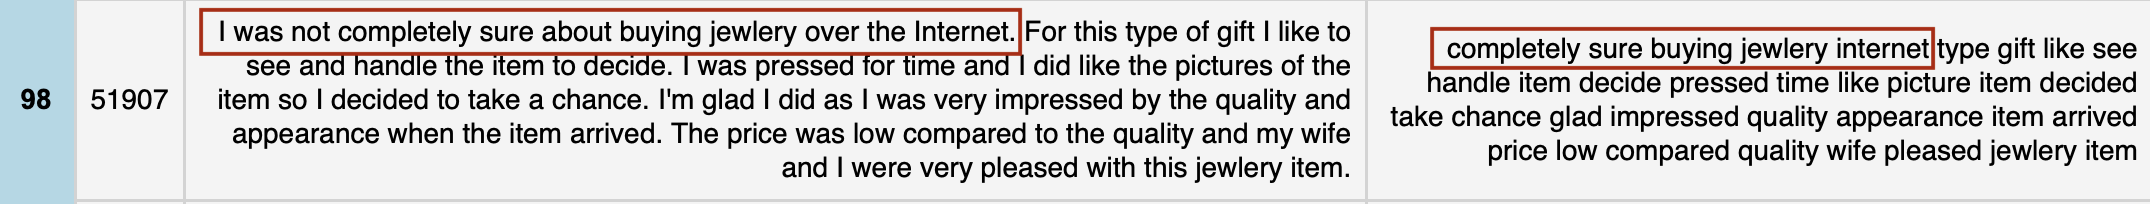

  * Final Processed Data Example

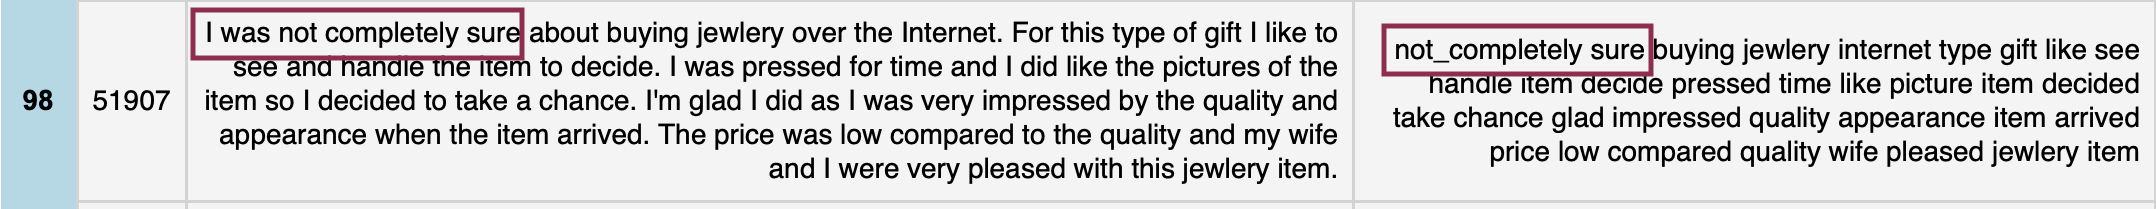

* Tokenization Update

 Using nltk.word_tokenize for more nuanced splitting that respects language constructs better than simple split().


 Stop words are those words that do not contribute to the deeper meaning of the phrase. They are the most common words such as: “the“, “a“, and “is“.


In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [17]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove unwanted whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text using NLTK's word_tokenize for better accuracy
    words = word_tokenize(text)

    # Handle negations: merge negation with the next word
    negations = {"not", "no", "never"}
    i = 0
    while i < len(words):
        if words[i] in negations and i+1 < len(words):
            words[i] = words[i] + "_" + words[i+1]  # Merge the negation with the following word
            words.pop(i+1)  # Remove the next word from the list
        else:
            i += 1

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into processed text
    return ' '.join(lemmatized_words)


In [19]:
# Apply preprocessing
reviews_df['Processed_Reviews'] = reviews_df['Reviews'].apply(preprocess_text)

columns_to_display = ['ID', 'Reviews', 'Processed_Reviews']

# updated DataFrame table
print("Processed Reviews Dataset:")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
display(styled_df(reviews_df[columns_to_display]))

Processed Reviews Dataset:


,ID,Reviews,Processed_Reviews
0,32767,"i expect like regular size of ring,but this one look like a ring for toy or something funy, the MM of our rings is 5MM and this ring may be is 1MMso ridiculousMartin1/5 ct.tw Round Diamond Solitaire Ring in 18k White Gold",expect like regular size ring one look like ring toy something funy mm ring mm ring may mmso ridiculousmartin ct tw round diamond solitaire ring k white gold
1,15959,"I ordered a ring that stated Toe Ring"" in the description. The ring came very quickly but was not a toe ring. I don't know anyone with a size 8 toe. If you know anyone please direct them to this seller! Is it a wedding band, toe ring or thumb ring? Pick one!",ordered ring stated toe ring description ring came quickly not_a toe ring know anyone size toe know anyone please direct seller wedding band toe ring thumb ring pick one
2,43515,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond not_look great time diamond missing shoulder ring returned refund thanks alot amazon
3,46347,"This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds on the shoulder of the ring. I returned the ring for a replacement of the same ring, the second ring was even worse. Clearly visible white scratch right in the middle of a black diamond does not look that great. And this time 1 diamond missing on the shoulder of the ring. I returned it for a refund. Thanks alot Amazon.",ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond not_look great time diamond missing shoulder ring returned refund thanks alot amazon
4,30720,This is a huge waste of money I had it for about a month when the part that holds the symbol to the necklace broke. I seriously not wasting your money on this low quality item,huge waste money month part hold symbol necklace broke seriously not_wasting money low quality item
5,1816,The quality and look were not what I had anticipated. Very flimsy.I would not recommend this item,quality look not_what anticipated flimsy would not_recommend item
6,265,"The quality of this item was not up to expectations.The Top was scratched, the hinges did not line up to the pre-drilled holes and the staining was inconsistant. If I saw this item in a store I would not have purchased it.",quality item not_up expectation top scratched hinge not_line pre drilled hole staining inconsistant saw item store would not_have purchased
7,54548,"hard and can't wear it, the material is hard and not easy to wear I just don't like it I should have saved my money and got on from A&E",hard wear material hard not_easy wear like saved money got e
8,28250,"I wanted to know if this ring is like 2 rings in one, because this ring is beyond gorgeous, I just love it.",wanted know ring like ring one ring beyond gorgeous love
9,30773,"Nice ring for the an inexpensive ring, but one stone was missing. It was not worth returning it as you would pay more for postage than what the ring cost.",nice ring inexpensive ring one stone missing not_worth returning would pay postage ring cost


In [20]:
columns_to_display = ['Ratings','Targets', 'Processed_Targets']

# Display the updated DataFrame with selected columns
print("Processed Summarisation Targets Dataset:")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)  # Ensures all selected columns are shown
display(styled_df(summarisation_targets_df[columns_to_display]))

Processed Summarisation Targets Dataset:


,Ratings,Targets,Processed_Targets
0,1,I will not be buying this ring again. I will not be ordering from Amazon or this jeweler in the future. The first shipment of this ring had scratches on the diamond. Very disappointed in the appearance and quality.,buying ring ordering amazon jeweler future first shipment ring scratch diamond disappointed appearance quality
1,2,It was not worth returning it as you would pay more for postage than what the ring cost. The ring was nice and looked like picture but had a crack in one Garnet and another one had a large chip. I would recommend you spend it a little bit more and buy a better looking ring. I'm very disappointed with amazon for the lack of description.,worth returning would pay postage ring cost ring nice looked like picture crack one garnet another one large chip would recommend spend little bit buy better looking ring disappointed amazon lack description
2,3,This ring is a beautiful ring but the first shipment of this ring had scratches on the diamond and was missing 2 diamonds. I was not sure if the diamonds were actually blue or not. I was a little disappointed with the size of the rings. Only thing is you cant have this ring resized.,ring beautiful ring first shipment ring scratch diamond missing diamond sure diamond actually blue little disappointed size ring thing cant ring resized
3,4,I love the shipping pace. The ring itself is beautiful. I have been looking for a ring that is so beautiful and unique. This is a solid.beautiful ring. But if you are expecting the color in rhe picture you will be disappointed. I love this ring my only complaint is that the metal is so soft.,love shipping pace ring beautiful looking ring beautiful unique solid beautiful ring expecting color rhe picture disappointed love ring complaint metal soft
4,5,This ring is gorgeous. I love the ring and would recommend it to anyone who likes to wear a ring. I am a huge fan of the ring and I would recommend it to anyone looking for a ring. I am so glad I bought this ring.,ring gorgeous love ring would recommend anyone like wear ring huge fan ring would recommend anyone looking ring glad bought ring


 Latent Semantic Indexing (LSI) and Neural Information Retrieval
Lemmatization would generally be more beneficial here because LSI and neural models benefit from the accuracy of lemmas in maintaining the semantic integrity of the words. Correct lemmas help in better capturing the relationships between terms in a document, which is crucial for these models.

Lemmatization is again preferable for clustering, as having precise, meaningful base forms of words leads to more accurate groupings. Clusters formed from lemmatized words will more likely represent meaningful topics or themes in the data.

Stemming might lead to overly broad or imprecise clusters due to its less nuanced approach to reducing words to their base forms.

# 1.4. Saving pre-processed Datasets

In [21]:
reviews_df.to_csv('/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/processed_reviews.csv', index=False)

summarisation_targets_df[columns_to_display].to_csv('/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/processed_summarisation_targets.csv', index=False)


# 2. Latent Semantic Indexing (LSI) and Neural Information Retrieval


# 2.1 LSI Introduction

Latent Semantic Indexing (LSI) (Deerwester, Dumais, Landauer, Furnas, & Harshman, 1990) is a well-known information retrieval algorithm. LSI has been applied to a wide variety of learning tasks, such as search and retrieval (Deerwester et al., 1990), classification (Zelikovitz & Hirsh, 2001) and filtering (Dumais, 1994, Dumais, 1995). [1]

LSI works using the partial application of Singular Value Decomposition (SVD). SVD is a mathematical operation that reduces a matrix to its constituent parts for simple and efficient calculations.

In [22]:
reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/processed_reviews.csv')
# Assuming 'Processed_Reviews' is the column with preprocessed text
documents = reviews_df['Processed_Reviews'].tolist()

# LSI
LSI starts with creating a numerical representation of your text data. The most common approach is to use TF-IDF (Term Frequency-Inverse Document Frequency), which weighs each word in your documents by how unique it is across the entire document corpus.

TF (Term Frequency): Measures how frequently a term occurs in a document.
IDF (Inverse Document Frequency): Measures how important a term is within the whole corpus.


* TfidfVectorizer from Scikit-learn to convert your text documents into a TF-IDF matrix.[2]
* Convert the TF-IDF matrix into a format that Gensim can use (corpus), and create a dictionary that maps each unique word to a specific index in your feature space.
* Gensim's LsiModel to create the LSI model. Here, num_topics refers to the number of latent dimensions or topics you want to use to represent your documents. It's a critical parameter and usually requires some experimentation to find the optimal number for the best balance between information retention and noise reduction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models, corpora
import gensim

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

corpus = gensim.matutils.Sparse2Corpus(tfidf_matrix, documents_columns=False)
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in tfidf_vectorizer.vocabulary_.items()))


# Evaluate Models

Train LSI Models for Each Number of Topics

In [24]:
num_topics_list = range(10, 100)

In [25]:
import matplotlib.pyplot as plt
from gensim import models, corpora
from gensim.models.coherencemodel import CoherenceModel

def train_and_evaluate_lsi(corpus, dictionary, num_topics_list, documents):
    coherence_scores = {}
    for num_topics in num_topics_list:
        # Train LSI model
        lsi_model = models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

        # Evaluation - Coherence Score
        coherence_model = CoherenceModel(model=lsi_model, texts=[doc.split() for doc in documents], dictionary=dictionary, coherence='c_v')
        coherence_scores[num_topics] = coherence_model.get_coherence()

        print(f"Trained LSI model with {num_topics} topics, coherence score: {coherence_scores[num_topics]}")

    # Plot coherence scores within the function
    plt.figure(figsize=(10, 5))
    plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Scores by Number of Topics')
    plt.grid(True)
    plt.show()

    return coherence_scores


Trained LSI model with 10 topics, coherence score: 0.41831660216269706
Trained LSI model with 11 topics, coherence score: 0.3525311122042489
Trained LSI model with 12 topics, coherence score: 0.4055423143371242
Trained LSI model with 13 topics, coherence score: 0.40883107667494656
Trained LSI model with 14 topics, coherence score: 0.399360952292973
Trained LSI model with 15 topics, coherence score: 0.42160410185508235
Trained LSI model with 16 topics, coherence score: 0.41578038513667126
Trained LSI model with 17 topics, coherence score: 0.41587650700367784
Trained LSI model with 18 topics, coherence score: 0.4238729167426827
Trained LSI model with 19 topics, coherence score: 0.39834402467657837
Trained LSI model with 20 topics, coherence score: 0.40554454821689784
Trained LSI model with 21 topics, coherence score: 0.42324190032477366
Trained LSI model with 22 topics, coherence score: 0.4171298776024824
Trained LSI model with 23 topics, coherence score: 0.3934536817408015
Trained LSI m

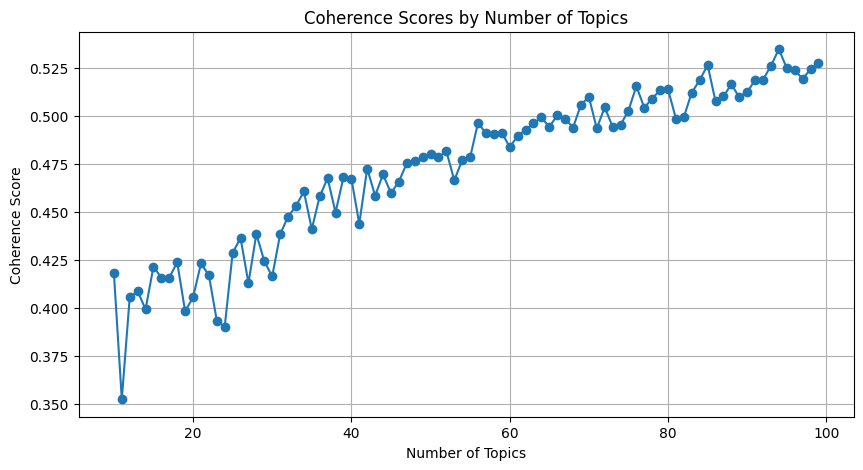

In [26]:
coherence_scores = train_and_evaluate_lsi(corpus, dictionary, num_topics_list, documents)

the performace clearly improves while the numbers of topics increase

Trained LSI model with 100 topics, coherence score: 0.5322853802473284
Trained LSI model with 101 topics, coherence score: 0.5246534666964318
Trained LSI model with 102 topics, coherence score: 0.5229836949806609
Trained LSI model with 103 topics, coherence score: 0.5221270561089999
Trained LSI model with 104 topics, coherence score: 0.5239050569732272
Trained LSI model with 105 topics, coherence score: 0.5227870658016845
Trained LSI model with 106 topics, coherence score: 0.5354269780294484
Trained LSI model with 107 topics, coherence score: 0.532585098214959
Trained LSI model with 108 topics, coherence score: 0.5374579210831318
Trained LSI model with 109 topics, coherence score: 0.5260543156347783
Trained LSI model with 110 topics, coherence score: 0.5378961400042901
Trained LSI model with 111 topics, coherence score: 0.5273177243716618
Trained LSI model with 112 topics, coherence score: 0.5419585773030616
Trained LSI model with 113 topics, coherence score: 0.5411381786261674
Trained

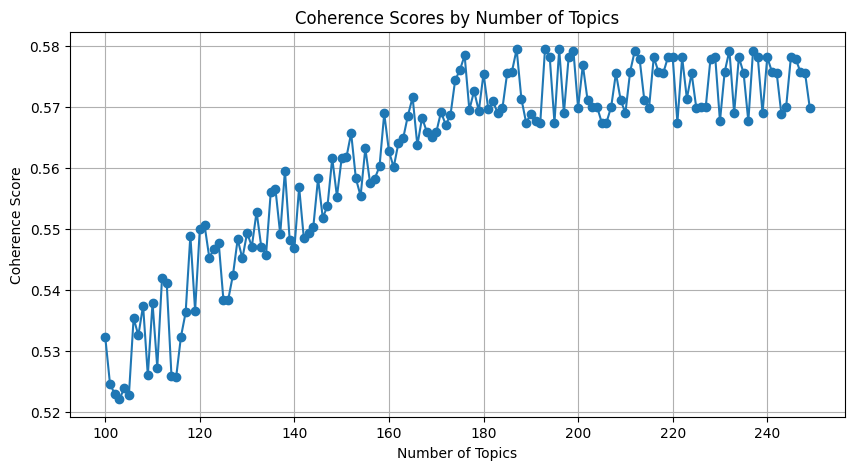

In [27]:
num_topics_list = range(100, 250)
coherence_scores = train_and_evaluate_lsi(corpus, dictionary, num_topics_list, documents)

ANALYSIS

coherence scores of a Latent Semantic Indexing (LSI) model vs the number of topics used.

The graph shows a general trend where the coherence score increases with the number of topics up to a point and then oscillates around certain values without a significant upward trend.

Model Overfitting: Beyond this point, increasing the number of topics doesn't substantially improve the coherence, which could lead to overfitting if the model becomes too complex with too many topics.

selecting the model with around 250 topics for further use and analysis, as it offers a balance between complexity and interpretability.

In [28]:
from sklearn.model_selection import KFold

In [35]:
# Correct and verify cross-validation function
def cross_validate_lsi(corpus, dictionary, num_topics_list, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    average_coherence_scores = {}

    for num_topics in num_topics_list:
        fold_coherence_scores = []

        for train_index, test_index in kf.split(list(corpus)):  # Ensure corpus can be indexed
            train_corpus = [corpus[i] for i in train_index]
            test_corpus = [corpus[i] for i in test_index]

            lsi_model = models.LsiModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics)
            test_texts = [[dictionary[word_id] for word_id in document] for document in test_corpus if document]
            coherence_model = CoherenceModel(model=lsi_model, texts=test_texts, dictionary=dictionary, coherence='c_v')
            fold_coherence_scores.append(coherence_model.get_coherence())

        average_coherence_scores[num_topics] = sum(fold_coherence_scores) / k_folds
        print(f"Average coherence for {num_topics} topics across {k_folds} folds: {average_coherence_scores[num_topics]}")

    return average_coherence_scores

# Execute with corrected corpus
num_topics_list = range(100, 300, 20)
cross_validated_scores = cross_validate_lsi(corpus, dictionary, num_topics_list)


ValueError: too many values to unpack (expected 2)

# Neural Information Retrieval

Neural Information Retrieval (NeuIR) is a modern approach to information retrieval that leverages neural network architectures to improve the relevance and accuracy of search results based on complex patterns in the data, rather than relying solely on traditional keyword matches or statistical methods.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
texts = reviews_df['Processed_Reviews'].values

labels = reviews_df['Ratings'].values - 1  # Zero-index the ratings
labels = to_categorical(labels, num_classes=5)  # One-hot encode

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=200)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

NameError: name 'reviews_df' is not defined

In [ ]:
def create_model(vocab_size, embedding_dim=100):
    model = Sequential([
        Embedding(vocab_size, embedding_dim),
        GlobalAveragePooling1D(),
        Dense(16, activation='relu'),
        Dense(5, activation='softmax')  # Change to 5 output neurons with softmax
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model(vocab_size=20000)



In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.3417 - loss: 1.5726 - val_accuracy: 0.5833 - val_loss: 1.3605
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5043 - loss: 1.4336 - val_accuracy: 0.5833 - val_loss: 1.2578
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4844 - loss: 1.4272 - val_accuracy: 0.5833 - val_loss: 1.2351
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4648 - loss: 1.4632 - val_accuracy: 0.5833 - val_loss: 1.2348
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5217 - loss: 1.3545 - val_accuracy: 0.5833 - val_loss: 1.2424
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4844 - loss: 1.4129 - val_accuracy: 0.5833 - val_loss: 1.2626
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5282 - loss: 1.3444 - val_accuracy: 0.5833 - val_loss: 1.2746
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5360 - loss: 1.3289 - val_accuracy: 0.5833 - val_loss: 1.2799


In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5660 - loss: 1.2974
Test Loss: 1.2717623710632324
Test Accuracy: 0.5833333134651184


# Further Visualisation

In [1]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)


NameError: name 'model' is not defined

REFERENCES

1. https://www.sciencedirect.com/science/article/abs/pii/S0306457304001529
2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html